In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# import matplotlib.patches as mpatches
# import math

# def create_radar_chart(labels, datasets, category_names, category_spans, category_colors, fill_models=False, title="Radar Chart", hide_outer_circle=False):

#     num_vars = len(labels)

#     # --- Calculate Angles ---
#     # Angles for the axes (in radians).
#     angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
#     # Angles for plotting data lines (close the loop).
#     plot_angles = angles + angles[:1]
#     # Angle delta between axes
#     delta_angle = 2 * np.pi / num_vars

#     # --- Initialize Plot ---
#     fig, ax = plt.subplots(figsize=(14, 14), subplot_kw=dict(polar=True))  # Increase size further

#     # --- Styling ---
#     plt.style.use('seaborn-v0_8-whitegrid')
#     font_family = 'sans-serif'
#     plt.rcParams['font.family'] = font_family
    
#     # Turn off all outer spines, including the outermost circle
#     ax.spines['polar'].set_visible(False)

#     # --- Set Axis Limits and Ticks (Range 0-1) ---
#     min_val = 0
#     max_val = 1.0
#     # Important: Set ylim to a higher value to ensure arcs are visible
#     visible_max = max_val + 0.3  # Extend the visible range for arcs
#     ax.set_ylim(min_val, visible_max)
    
#     # --- Add Outer Category Arcs FIRST (moving this section earlier) ---
#     start_angle_idx = 0
#     arc_radius = max_val + 0.15  # Radius for the arc
#     text_radius = arc_radius + 0.15  # Radius for the text label

#     for i, span in enumerate(category_spans):
#         end_angle_idx = start_angle_idx + span
        
#         # Get angles for this category section
#         original_start_angle = angles[start_angle_idx]
#         original_end_angle = angles[(end_angle_idx - 1) % num_vars]
        
#         # Handle wrapping around the circle
#         if original_end_angle < original_start_angle:
#             original_end_angle += 2 * np.pi
            
#         # Add padding for the arcs
#         angle_padding = delta_angle * 0.45
#         arc_start_angle = original_start_angle - angle_padding
#         arc_end_angle = original_end_angle + angle_padding
        
#         # Instead of using matplotlib's line with round caps, create a patch for a straight-edged arc
#         color = category_colors[i]
        
#         # Create arc points
#         arc_theta = np.linspace(arc_start_angle, arc_end_angle, 100)
#         inner_r = arc_radius - 0.12  # Inner radius of the arc
#         outer_r = arc_radius + 0.175  # Outer radius of the arc
        
#         # Create a list of points for the arc patch (straight edges)
#         verts = []
#         # Add points along the outer edge of the arc
#         for t in arc_theta:
#             verts.append((t, outer_r))
#         # Add points along the inner edge of the arc (in reverse)
#         for t in arc_theta[::-1]:
#             verts.append((t, inner_r))
        
#         # Create a polygon patch for the arc with zorder=0 (very back)
#         arc_patch = mpatches.Polygon(verts, closed=True, color=color, alpha=0.5, zorder=0)
#         ax.add_patch(arc_patch)
        
#         start_angle_idx = end_angle_idx % num_vars

#         # Add the category label
#         # Calculate midpoint angle for the category label
#         mid_angle = (arc_start_angle + arc_end_angle) / 2
#         ax.text(
#             mid_angle, text_radius+0.12, category_names[i],
#             ha='center', va='center',
#             fontsize=16, fontweight='bold', color='black',
#             #bbox=dict(boxstyle='round,pad=0.4', facecolor='white', alpha=0.5, edgecolor=color)
#         )

    
#     # Set ticks in the data range
#     yticks = np.linspace(min_val, max_val, 6)  # 0, 0.2, ..., 1.0
#     ax.set_yticks(yticks-0.065)
#     ax.set_yticklabels([f"{i:.1f}" for i in yticks], color="grey", size=10)
    
#     # Move radial labels position
#     ax.set_rlabel_position(0)  # Position at 0 degrees
    
#     # --- Draw the outermost circle (make it bolder) ---
#     theta = np.linspace(0, 2*np.pi, 500)
#     r = np.ones_like(theta)
#     # if not hide_outer_circle:
#     #     ax.plot(theta, r, color='gray', linewidth=2.5, zorder=10)  # Bolder outer circle
    
#     # --- Modify grid appearance ---
#     # Remove default grid
#     ax.grid(False)
    
#     # Manually draw circular grid lines (except the outermost which we drew above)
#     for ytick in yticks[1:-1]:  # Exclude the last tick (1.0) which we drew above
#         ax.plot(theta, np.ones_like(theta) * ytick, color='gray', linestyle='-', linewidth=0.8, alpha=0.3, zorder=10)
#     ax.plot(theta, np.ones_like(theta) * yticks[-1], color='gray', linestyle='-', linewidth=2, alpha=1, zorder=10)

#     # --- Draw axis lines that extend all the way to the center ---
#     # ax.set_ylim(0, max_val)
#     visible_max = max_val + 0.3  # Extend the visible range for arcs
#     ax.set_ylim(0, visible_max)
#     for angle in angles:
#         ax.plot([angle, angle], [0, max_val], color='gray', linestyle='-', linewidth=0.8, alpha=0.5, zorder=10)

#     # --- Plot Multiple Datasets ---
#     prop_cycle = plt.rcParams['axes.prop_cycle']
#     line_colors = prop_cycle.by_key()['color']

#     for i, (name, data) in enumerate(datasets.items()):
#         plot_data = data + data[:1]  # Close the loop
#         color = line_colors[i % len(line_colors)]
#         ax.plot(plot_angles, plot_data, linewidth=2.5, linestyle='solid', color=color, label=name, zorder=15)
#         # Remove filling regardless of fill_models parameter
#         # No fill for model lines per user request

#     # --- Customize Axes Labels ---
#     print("Angles: ", angles)
#     ax.set_xticks(np.array(angles))
#     ax.tick_params(axis='x', pad=-49)  # Reduced padding for labels
#     ax.set_xticklabels(labels, size=14, fontweight='bold', zorder=20)  # Very high zorder for labels

#     # --- Add Title and Legend ---
#     plt.title(title, size=18, weight='bold', y=1.05)
    
#     # Customize the legend with highest zorder
#     legend = ax.legend(
#         loc='upper right', 
#         bbox_to_anchor=(1.25, 1.0),
#         frameon=True,
#         framealpha=0.9,
#         fontsize=16,
#         # zorder=25  # Highest zorder
#     )
#     legend.get_frame().set_edgecolor('lightgray')

#     plt.tight_layout()
    
#     return fig, ax

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import math

def create_radar_chart(labels, datasets, category_names, category_spans, category_colors, fill_models=False, title="Radar Chart", hide_outer_circle=False):

    num_vars = len(labels)

    # --- Calculate Angles ---
    # Angles for the axes (in radians).
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    # Angles for plotting data lines (close the loop).
    plot_angles = angles + angles[:1]
    # Angle delta between axes
    delta_angle = 2 * np.pi / num_vars

    # --- Initialize Plot ---
    fig, ax = plt.subplots(figsize=(14, 14), subplot_kw=dict(polar=True))  # Increase size further

    # --- Styling ---
    plt.style.use('seaborn-v0_8-whitegrid')
    font_family = 'sans-serif'
    plt.rcParams['font.family'] = font_family
    
    # Turn off all outer spines, including the outermost circle
    ax.spines['polar'].set_visible(False)

    # --- Set Axis Limits and Ticks (Range 0-1) ---
    min_val = 0
    max_val = 1.0
    # Important: Set ylim to a higher value to ensure arcs are visible
    visible_max = max_val + 0.3  # Extend the visible range for arcs
    ax.set_ylim(min_val, visible_max)
    
    # --- Add Outer Category Arcs FIRST (moving this section earlier) ---
    start_angle_idx = 0
    arc_radius = max_val + 0.12  # Radius for the arc
    text_radius = arc_radius + 0.15  # Radius for the text label

    for i, span in enumerate(category_spans):
        end_angle_idx = start_angle_idx + span
        
        # Get angles for this category section
        original_start_angle = angles[start_angle_idx]
        original_end_angle = angles[(end_angle_idx - 1) % num_vars]
        
        # Handle wrapping around the circle
        if original_end_angle < original_start_angle:
            original_end_angle += 2 * np.pi
            
        # Add padding for the arcs
        angle_padding = delta_angle * 0.50
        arc_start_angle = original_start_angle - angle_padding
        arc_end_angle = original_end_angle + angle_padding
        
        # Instead of using matplotlib's line with round caps, create a patch for a straight-edged arc
        color = category_colors[i]
        
        # Create arc points
        arc_theta = np.linspace(arc_start_angle, arc_end_angle, 100)
        inner_r = arc_radius - 0.12  # Inner radius of the arc
        outer_r = arc_radius + 0.50  # Outer radius of the arc
        
        # Create a list of points for the arc patch (straight edges)
        verts = []
        # Add points along the outer edge of the arc
        for t in arc_theta:
            verts.append((t, outer_r))
        # Add points along the inner edge of the arc (in reverse)
        for t in arc_theta[::-1]:
            verts.append((t, inner_r))
        
        # Create a polygon patch for the arc with zorder=0 (very back)
        arc_patch = mpatches.Polygon(verts, closed=True, color=color, alpha=0.5, zorder=0)
        ax.add_patch(arc_patch)
        
        start_angle_idx = end_angle_idx % num_vars

        # Add the category label
        # Calculate midpoint angle for the category label
        mid_angle = (arc_start_angle + arc_end_angle) / 2
        ax.text(
            mid_angle, text_radius+0.22, category_names[i],
            ha='center', va='center',
            fontsize=30, fontweight='bold', color='black',
            #bbox=dict(boxstyle='round,pad=0.4', facecolor='white', alpha=0.5, edgecolor=color)
        )

    
    # Set ticks in the data range
    yticks = np.linspace(min_val, max_val, 6)  # 0, 0.2, ..., 1.0
    ax.set_yticks(yticks-0.065)
    ax.set_yticklabels([f"{i:.1f}" for i in yticks], color="grey", size=10)
    
    # Move radial labels position
    ax.set_rlabel_position(0)  # Position at 0 degrees
    
    # --- Draw the outermost circle (make it bolder) ---
    theta = np.linspace(0, 2*np.pi, 500)
    r = np.ones_like(theta)
    # if not hide_outer_circle:
    #     ax.plot(theta, r, color='gray', linewidth=2.5, zorder=10)  # Bolder outer circle
    
    # --- Modify grid appearance ---
    # Remove default grid
    ax.grid(False)
    
    # Manually draw circular grid lines (except the outermost which we drew above)
    for ytick in yticks[1:-1]:  # Exclude the last tick (1.0) which we drew above
        ax.plot(theta, np.ones_like(theta) * ytick, color='gray', linestyle='-', linewidth=0.8, alpha=0.3, zorder=10)
    ax.plot(theta, np.ones_like(theta) * yticks[-1], color='gray', linestyle='-', linewidth=2, alpha=1, zorder=10)

    # --- Draw axis lines that extend all the way to the center ---
    # ax.set_ylim(0, max_val)
    visible_max = max_val + 0.3  # Extend the visible range for arcs
    ax.set_ylim(0, visible_max)
    for angle in angles:
        ax.plot([angle, angle], [0, max_val], color='gray', linestyle='-', linewidth=0.8, alpha=0.5, zorder=10)

    # --- Plot Multiple Datasets ---
    prop_cycle = plt.rcParams['axes.prop_cycle']
    line_colors = prop_cycle.by_key()['color']

    for i, (name, data) in enumerate(datasets.items()):
        plot_data = data + data[:1]  # Close the loop
        color = line_colors[i % len(line_colors)]
        ax.plot(plot_angles, plot_data, linewidth=3.5, linestyle='solid', color=color, label=name, zorder=15)
        # Remove filling regardless of fill_models parameter
        # No fill for model lines per user request

    # --- Customize Axes Labels ---
    print("Angles: ", angles)
    ax.set_xticks(np.array(angles))
    ax.tick_params(axis='x', pad=-55)  # Reduced padding for labels
    ax.set_xticklabels(labels, size=26, fontweight='bold', zorder=20)  # Very high zorder for labels

    # --- Add Title and Legend ---
    # plt.title(title, size=18, weight='bold', y=1.05)
    
    # Customize the legend with highest zorder
    # legend = ax.legend(
    #     loc='upper right', 
    #     bbox_to_anchor=(1.25, 1.0),
    #     frameon=True,
    #     framealpha=0.9,
    #     fontsize=16,
    #     # zorder=25  # Highest zorder
    # )
    # legend.get_frame().set_edgecolor('lightgray')

    plt.tight_layout()
    
    return fig, ax

In [27]:
# 1. Define Labels
doc_elements = ["<15%", f"15-25%",">25%"]
layout = ["<4 pg","4-8 pg",">8 pg"]
nlp_entities = ["Num.", "Temp.", "Misc", "Location", "Struct."]
all_labels = doc_elements + layout + nlp_entities

In [28]:
# 2. Define Category Names, Spans, and Colors
category_names = ["Document\nElement", "Layout", "NLP\nEntity Type"]
category_spans = [len(doc_elements), len(layout), len(nlp_entities)]
category_colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Blue, Orange, Green

In [4]:
all_labels

['<15%',
 '15%-25%',
 '>25%',
 '<4 pages',
 '4-8 pages',
 '>8 pages',
 'Numerical',
 'Temporal',
 'Misc',
 'Location',
 'Structure']

In [5]:
# 3. Provide Sample Data
datasets_example = {
    'Molmo 7B':         [],
    'Ovis 1.6 9B':      [],
    'DocOwl 2':         [],
    'Phi 3.5':          [],
    'Qwen 2.5 7B':      [],
    'InternVL 2.5 8B':  [],
    'Llama 3.2 11B':    [],
    'Gemma 3 27B':      [],
    'Llava 1.6 34B':    [],
}

In [6]:
order_colums=["Molmo","Ovis","DocOwl","Phi","Qwen","InternVL","Llama","Gemma27","Llava34"]

In [7]:
# read results/QUR_DE.csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# read results/QUR_DE.csv
df = pd.read_csv('results_w1/results/QUR_DED.csv', index_col=0)
df = df[order_colums]
df

,Molmo,Ovis,DocOwl,Phi,Qwen,InternVL,Llama,Gemma27,Llava34
<15,0.353591,0.226519,0.016575,0.085635,0.491713,0.229282,0.331492,0.392265,0.339779
15-25,0.117647,0.117647,0.000000,0.058824,0.352941,0.058824,0.176471,0.470588,0.588235
>25,0.296296,0.148148,0.000000,0.222222,0.555556,0.296296,0.333333,0.370370,0.444444


In [8]:
# weights = {
# '<15': 0.6684491978609626,
# '>25': 0.22459893048128343,
# '15-25': 0.10695187165775401
# }
weights = {'<15': 1.0, '15-25': 0.04696132596685083, '>25': 0.07458563535911603}#{'<15': 1.0, '15-25': 0.16, '>25': 0.336}

In [9]:
index_list = list(weights.keys())
index_list

['<15', '15-25', '>25']

In [10]:
normalized_df = pd.DataFrame(columns=order_colums)
# Normalize the values in the DataFrame. The weights dictionary is linked to dataframe index
for i, row in df.iterrows():
    # print(i,row.values)
    normalized_row = row.values*weights[i]
    # print(type(normalized_row),normalized_row)
    normalized_df.loc[len(normalized_df)] = normalized_row
# set indexes equal to the keys of weights
normalized_df.index = index_list
# normalized_df

# sort rows by index [<15, 15-25, >25]
normalized_df = normalized_df.reindex(['<15', '15-25', '>25'])
# normalized_df = normalized_df.sort_index()
normalized_df

,Molmo,Ovis,DocOwl,Phi,Qwen,InternVL,Llama,Gemma27,Llava34
<15,0.353591,0.226519,0.016575,0.085635,0.491713,0.229282,0.331492,0.392265,0.339779
15-25,0.005525,0.005525,0.000000,0.002762,0.016575,0.002762,0.008287,0.022099,0.027624
>25,0.022099,0.011050,0.000000,0.016575,0.041436,0.022099,0.024862,0.027624,0.033149


In [11]:
# add first row to datasets_example
for i, row in normalized_df.iterrows():
    # print(i,row.values)
    idx=0
    for k,v in datasets_example.items():
        v.append(row.values[idx])
        idx+=1
datasets_example

{'Molmo 7B': [0.3535911602209944, 0.005524861878453038, 0.022099447513812154],
 'Ovis 1.6 9B': [0.2265193370165746,
  0.005524861878453038,
  0.011049723756906075],
 'DocOwl 2': [0.0165745856353591, 0.0, 0.0],
 'Phi 3.5': [0.0856353591160221, 0.002762430939226519, 0.016574585635359115],
 'Qwen 2.5 7B': [0.4917127071823204,
  0.016574585635359115,
  0.041436464088397795],
 'InternVL 2.5 8B': [0.2292817679558011,
  0.002762430939226519,
  0.022099447513812154],
 'Llama 3.2 11B': [0.3314917127071823,
  0.008287292817679558,
  0.024861878453038673],
 'Gemma 3 27B': [0.3922651933701657, 0.02209944751381215, 0.02762430939226519],
 'Llava 1.6 34B': [0.3397790055248619,
  0.027624309392265192,
  0.03314917127071823]}

In [12]:
df = pd.read_csv('results_w1/results/QUR_PL.csv', index_col=0)
df = df.sort_index(ascending=True)
df = df[order_colums]
df

,Molmo,Ovis,DocOwl,Phi,Qwen,InternVL,Llama,Gemma27,Llava34
1,0.285714,0.309524,0.023810,0.095238,0.500000,0.238095,0.380952,0.452381,0.714286
2,0.283784,0.148649,0.027027,0.054054,0.500000,0.108108,0.270270,0.472973,0.500000
3,0.350000,0.175000,0.000000,0.100000,0.525000,0.300000,0.375000,0.550000,0.450000
4,0.263158,0.236842,0.000000,0.052632,0.473684,0.236842,0.236842,0.578947,0.605263
5,0.257143,0.342857,0.000000,0.028571,0.485714,0.314286,0.342857,0.285714,0.171429
6,0.428571,0.400000,0.000000,0.228571,0.542857,0.371429,0.428571,0.485714,0.371429
7,0.333333,0.250000,0.000000,0.083333,0.666667,0.333333,0.416667,0.583333,0.083333
8,0.470588,0.470588,0.058824,0.117647,0.470588,0.176471,0.411765,0.529412,0.235294
9,0.294118,0.058824,0.058824,0.176471,0.470588,0.294118,0.352941,0.294118,0.235294
10,0.454545,0.272727,0.000000,0.272727,0.636364,0.272727,0.363636,0.272727,0.363636


In [13]:
# remove rows linked to index values 4,5,11,12
df = df.drop(index=[5,6,17,20])
df

,Molmo,Ovis,DocOwl,Phi,Qwen,InternVL,Llama,Gemma27,Llava34
1,0.285714,0.309524,0.023810,0.095238,0.500000,0.238095,0.380952,0.452381,0.714286
2,0.283784,0.148649,0.027027,0.054054,0.500000,0.108108,0.270270,0.472973,0.500000
3,0.350000,0.175000,0.000000,0.100000,0.525000,0.300000,0.375000,0.550000,0.450000
4,0.263158,0.236842,0.000000,0.052632,0.473684,0.236842,0.236842,0.578947,0.605263
7,0.333333,0.250000,0.000000,0.083333,0.666667,0.333333,0.416667,0.583333,0.083333
8,0.470588,0.470588,0.058824,0.117647,0.470588,0.176471,0.411765,0.529412,0.235294
9,0.294118,0.058824,0.058824,0.176471,0.470588,0.294118,0.352941,0.294118,0.235294
10,0.454545,0.272727,0.000000,0.272727,0.636364,0.272727,0.363636,0.272727,0.363636
11,0.800000,0.400000,0.000000,1.000000,1.000000,0.800000,0.400000,1.000000,0.200000
13,0.222222,0.000000,0.000000,0.000000,0.500000,0.055556,0.444444,0.111111,0.000000


In [14]:
df.columns

Index(['Molmo', 'Ovis', 'DocOwl', 'Phi', 'Qwen', 'InternVL', 'Llama',
       'Gemma27', 'Llava34'],
      dtype='object')

In [15]:
# weights = {
# 1: 0.2620320855614973,
# 2: 0.1657754010695187,
# 3: 0.10160427807486631,
# 4: 0.0213903743315508,
# 5: 0.0053475935828877,
# 6: 0.0053475935828877,
# 7: 0.0855614973262032,
# 8: 0.13903743315508021,
# 9: 0.0374331550802139,
# 10: 0.12834224598930483,
# 12: 0.03208556149732621,
# 17: 0.0106951871657754,
# 20: 0.0053475935828877
# }

# weights = {1: 1.0,
#  2: 0.6326530612244898,
#  3: 0.3877551020408163,
#  4: 0.08163265306122448,
#  5: 0.02040816326530612,
#  6: 0.02040816326530612,
#  7: 0.32653061224489793,
#  8: 0.5306122448979592,
#  9: 0.14285714285714285,
#  10: 0.4897959183673469,
#  12: 0.12244897959183673,
#  17: 0.04081632653061224,
#  20: 0.02040816326530612
#  }
    

In [16]:
# index_list = list(weights.keys())
# index_list

In [17]:
# normalized_df = pd.DataFrame(columns=['Molmo', 'Ovis', 'DocOwl', 'Gemma27', 'Phi', 'Qwen', 'InternVL','Llama'])
# # Normalize the values in the DataFrame. The weights dictionary is linked to dataframe index
# for i, row in df.iterrows():
#     # print(i,row.values)
#     normalized_row = row.values*weights[i]
#     # print(type(normalized_row),normalized_row)
#     normalized_df.loc[len(normalized_df)] = normalized_row
# # set indexes equal to the keys of weights
# normalized_df.index = index_list
# normalized_df

In [18]:
# # discretize normalized_df by index. New index are 1-4, 5-8, >8
# normalized_df['index'] = pd.cut(normalized_df.index, bins=[0, 4, 8, 100], labels=['<4pg', '4pg-8pg', '>8pg'])
# normalized_df = normalized_df.groupby('index').mean()
# normalized_df = normalized_df.reset_index()
# index_list = ['<4pg', '4pg-8pg', '>8pg']
# normalized_df = normalized_df.drop(columns=['index'])
# normalized_df.index = index_list
# normalized_df

In [19]:
# discretize df by index. New index are 1-4, 5-8, >8
df['index'] = pd.cut(df.index, bins=[0, 4, 8, 100], labels=['<4pg', '4pg-8pg', '>8pg'])
df = df.groupby('index').mean()
# normalized_df = normalized_df.reset_index()
index_list = ['<4pg', '4pg-8pg', '>8pg']
# df = df.drop(columns=['index'])
# df.index = index_list
df


/tmp/ipykernel_421054/1092106886.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = df.groupby('index').mean()


,Molmo,Ovis,DocOwl,Phi,Qwen,InternVL,Llama,Gemma27,Llava34
index,,,,,,,,,
<4pg,0.295664,0.217504,0.012709,0.075481,0.499671,0.220761,0.315766,0.513575,0.567387
4pg-8pg,0.401961,0.360294,0.029412,0.100490,0.568627,0.254902,0.414216,0.556373,0.159314
>8pg,0.440111,0.141444,0.007353,0.212400,0.525869,0.327800,0.370128,0.234745,0.131116


In [20]:
for i, row in df.iterrows():
    # print(i,row.values)
    idx=0
    for k,v in datasets_example.items():
        v.append(row.values[idx])
        idx+=1

In [21]:
datasets_example

{'Molmo 7B': [0.3535911602209944,
  0.005524861878453038,
  0.022099447513812154,
  0.29566399105872787,
  0.40196078431372545,
  0.4401106654783125],
 'Ovis 1.6 9B': [0.2265193370165746,
  0.005524861878453038,
  0.011049723756906075,
  0.21750364085890397,
  0.36029411764705876,
  0.14144385026737968],
 'DocOwl 2': [0.0165745856353591,
  0.0,
  0.0,
  0.0127091377091377,
  0.02941176470588235,
  0.007352941176470587],
 'Phi 3.5': [0.0856353591160221,
  0.002762430939226519,
  0.016574585635359115,
  0.07548093205987941,
  0.10049019607843135,
  0.21239973262032086],
 'Qwen 2.5 7B': [0.4917127071823204,
  0.016574585635359115,
  0.041436464088397795,
  0.49967105263157896,
  0.5686274509803921,
  0.5258689839572193],
 'InternVL 2.5 8B': [0.2292817679558011,
  0.002762430939226519,
  0.022099447513812154,
  0.22076136286662595,
  0.2549019607843137,
  0.32780005941770646],
 'Llama 3.2 11B': [0.3314917127071823,
  0.008287292817679558,
  0.024861878453038673,
  0.31576618912145227,
  0.

In [22]:
df = pd.read_csv('results_w1/results/QUR_NLPE.csv', index_col=0)
df = df[order_colums]
df

,Molmo,Ovis,DocOwl,Phi,Qwen,InternVL,Llama,Gemma27,Llava34
NUMERIC,0.340136,0.163265,0.013605,0.047619,0.442177,0.170068,0.340136,0.299320,0.312925
TEMPORAL,0.510638,0.276596,0.021277,0.063830,0.638298,0.255319,0.553191,0.382979,0.340426
ENTITY,0.255663,0.207120,0.006472,0.051780,0.420712,0.197411,0.297735,0.343042,0.368932
LOCATION,0.453846,0.307692,0.015385,0.215385,0.684615,0.353846,0.346154,0.607692,0.430769
STRUCTURE,0.264706,0.176471,0.029412,0.029412,0.235294,0.205882,0.264706,0.264706,0.411765


In [23]:
for i, row in df.iterrows():
    print(i,row.values)
    idx=0
    for k,v in datasets_example.items():
        v.append(row.values[idx])
        idx+=1

NUMERIC [0.34013605 0.16326531 0.01360544 0.04761905 0.44217687 0.17006803
 0.34013605 0.29931973 0.31292517]
TEMPORAL [0.5106383  0.27659574 0.0212766  0.06382979 0.63829787 0.25531915
 0.55319149 0.38297872 0.34042553]
ENTITY [0.25566343 0.20711974 0.00647249 0.05177994 0.42071197 0.197411
 0.29773463 0.34304207 0.36893204]
LOCATION [0.45384615 0.30769231 0.01538462 0.21538462 0.68461538 0.35384615
 0.34615385 0.60769231 0.43076923]
STRUCTURE [0.26470588 0.17647059 0.02941176 0.02941176 0.23529412 0.20588235
 0.26470588 0.26470588 0.41176471]


In [24]:
for k,v in datasets_example.items():
    print(k,len(v),v)

Molmo 7B 11 [0.3535911602209944, 0.005524861878453038, 0.022099447513812154, 0.29566399105872787, 0.40196078431372545, 0.4401106654783125, 0.3401360544217687, 0.5106382978723404, 0.255663430420712, 0.4538461538461538, 0.2647058823529412]
Ovis 1.6 9B 11 [0.2265193370165746, 0.005524861878453038, 0.011049723756906075, 0.21750364085890397, 0.36029411764705876, 0.14144385026737968, 0.1632653061224489, 0.2765957446808511, 0.2071197411003236, 0.3076923076923077, 0.1764705882352941]
DocOwl 2 11 [0.0165745856353591, 0.0, 0.0, 0.0127091377091377, 0.02941176470588235, 0.007352941176470587, 0.0136054421768707, 0.0212765957446808, 0.0064724919093851, 0.0153846153846153, 0.0294117647058823]
Phi 3.5 11 [0.0856353591160221, 0.002762430939226519, 0.016574585635359115, 0.07548093205987941, 0.10049019607843135, 0.21239973262032086, 0.0476190476190476, 0.0638297872340425, 0.0517799352750809, 0.2153846153846154, 0.0294117647058823]
Qwen 2.5 7B 11 [0.4917127071823204, 0.016574585635359115, 0.04143646408839

In [25]:
# remove DocOwl and Molmo from datasets_example
# datasets_example.pop('DocOwl 2')
# datasets_example.pop('Molmo 7B')

Angles:  [0.0, 0.5711986642890533, 1.1423973285781066, 1.7135959928671598, 2.284794657156213, 2.8559933214452666, 3.4271919857343196, 3.998390650023373, 4.569589314312426, 5.140787978601479, 5.711986642890533]


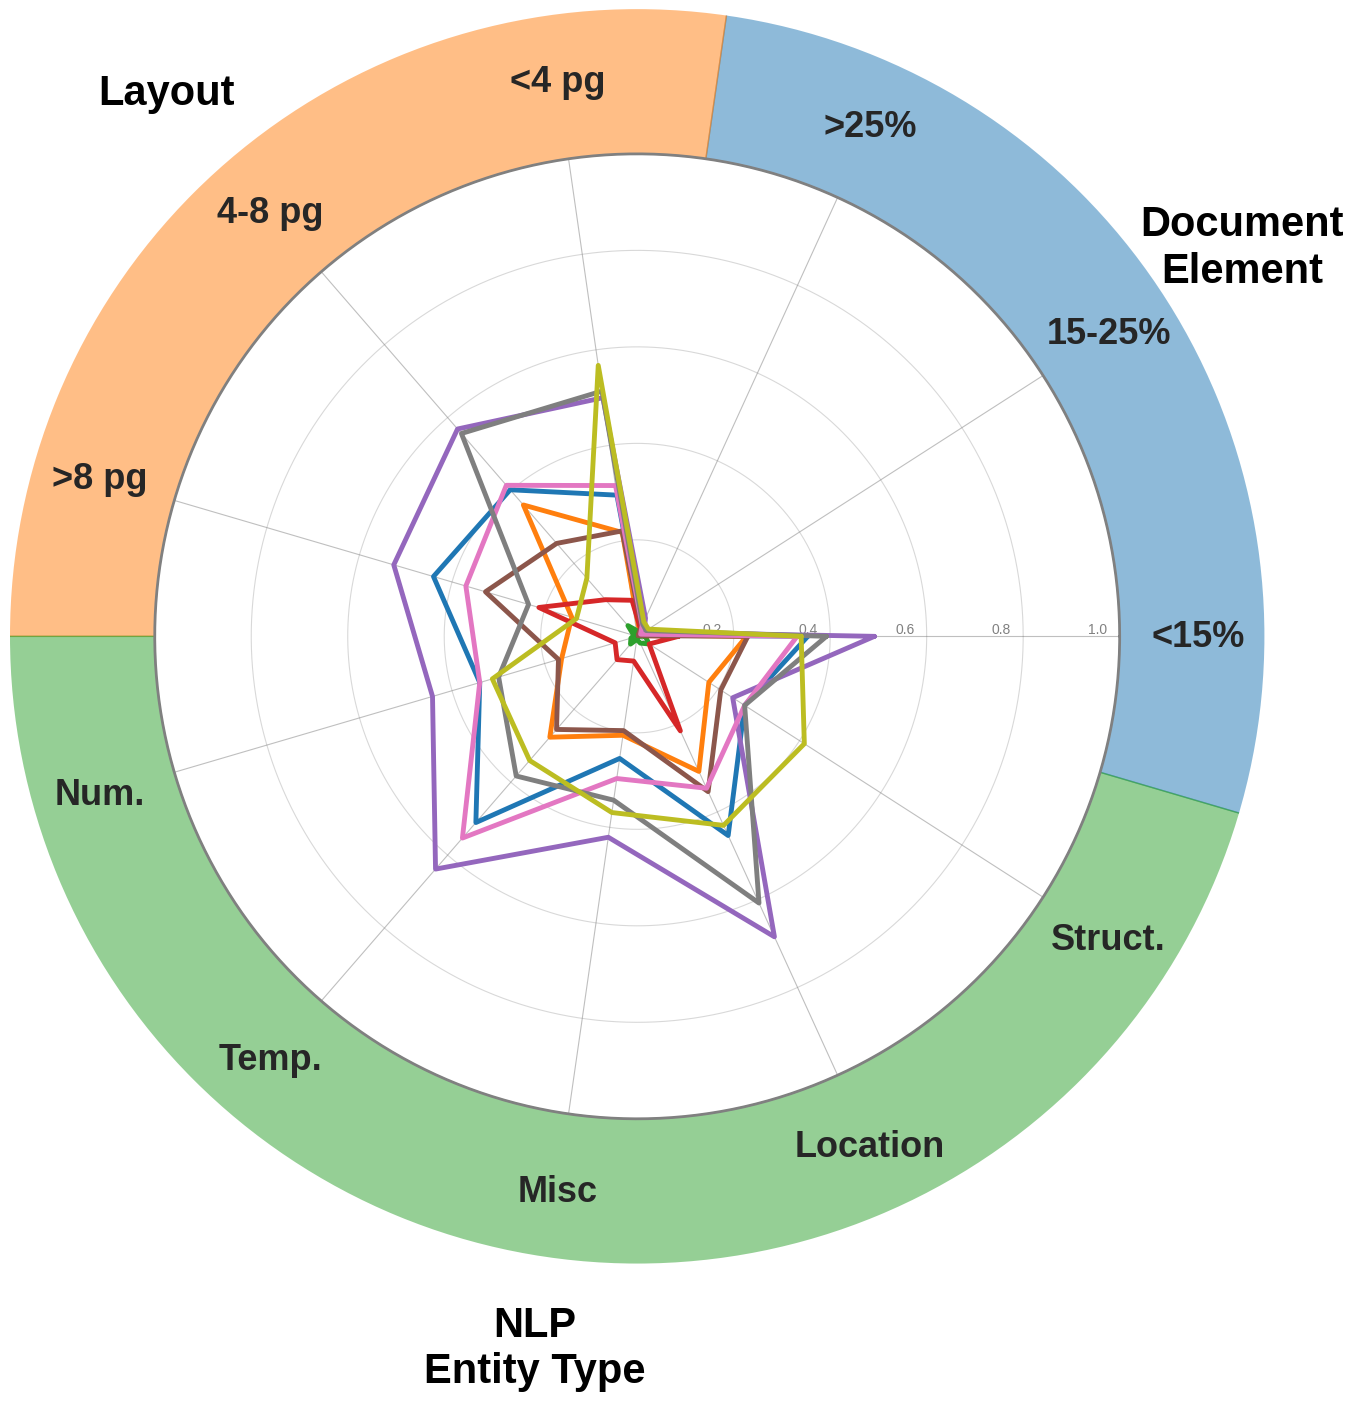

In [30]:
# 4. Generate the plot
try:
    fig, ax = create_radar_chart(
        labels=all_labels,
        datasets=datasets_example,
        category_names=category_names,
        category_spans=category_spans,
        category_colors=category_colors,
        fill_models=False,  # No fill as requested
        title=""
    )
    
    # Save the figure if needed
    dpi=200
    plt.savefig('MPDocVQA_QUR_RADAR_UP.svg', dpi=dpi, bbox_inches='tight')
    
    plt.show()
except ValueError as e:
    print(f"Error creating chart: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")